In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
import sys

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [3]:
# load DF 2021 metadata
DF21 = pd.read_csv('/datab/Dataset/ASVspoof/LA/ASVspoof2021_keys/DF/CM/trial_metadata.txt', sep=' ', header=None)
DF21.columns = ['sid', 'utt', 'codec', 'src', 'attack', 'label', 'trimed', 'subset', 'vocoder', 's1', 's2', 's3', 's4']
DF21.head


<bound method NDFrame.head of             sid           utt     codec       src        attack  label  \
0       LA_0023  DF_E_2000011   nocodec  asvspoof           A14  spoof   
1          TEF2  DF_E_2000013   low_m4a   vcc2020  Task1-team20  spoof   
2          TGF1  DF_E_2000024    mp3m4a   vcc2020  Task2-team12  spoof   
3       LA_0043  DF_E_2000026    mp3m4a  asvspoof           A09  spoof   
4       LA_0021  DF_E_2000027    mp3m4a  asvspoof           A12  spoof   
...         ...           ...       ...       ...           ...    ...   
611824  VCC2TM2  DF_E_4999945    oggm4a   vcc2018       SPO-N16  spoof   
611825  LA_0044  DF_E_4999962    oggm4a  asvspoof           A19  spoof   
611826  LA_0042  DF_E_4999964  high_ogg  asvspoof           A13  spoof   
611827     TEM1  DF_E_4999980   low_m4a   vcc2020  Task1-team07  spoof   
611828     TGF1  DF_E_4999993    mp3m4a   vcc2020  Task2-team33  spoof   

        trimed    subset                           vocoder     s1      s2  s3  \


In [4]:
# Samples 10000 randomly from the DF21 dataset
DF21_10000 = DF21.sample(n=10000, random_state=1)
DF21_10000.head

<bound method NDFrame.head of             sid           utt     codec       src        attack     label  \
133525  LA_0025  DF_E_2653213  high_m4a  asvspoof             -  bonafide   
266464  VCC2TM2  DF_E_3305982   low_m4a   vcc2018       HUB-N20     spoof   
248143     TEF1  DF_E_3215340    oggm4a   vcc2020  Task1-team31     spoof   
43253   LA_0043  DF_E_2211905  high_ogg  asvspoof           A12     spoof   
165195  VCC2TM1  DF_E_2809804   nocodec   vcc2018       HUB-N18     spoof   
...         ...           ...       ...       ...           ...       ...   
285565  VCC2TM2  DF_E_3399314  high_mp3   vcc2018       SPO-N11     spoof   
494104  LA_0015  DF_E_4422141   nocodec  asvspoof           A14     spoof   
311332     TEF2  DF_E_3525023   low_ogg   vcc2020             -  bonafide   
85782   LA_0033  DF_E_2420977   low_mp3  asvspoof           A11     spoof   
405087  LA_0031  DF_E_3986323   low_ogg  asvspoof             -  bonafide   

        trimed    subset                     

In [8]:
# load feats of vocosig, but only the 10000 samples
# feat is stored in each file with the name is utt.npy
# path: ./feats/vocosig/asvspoof2019_conf3_epoch46/
# store the feat in list and put to vocosig_feat colume in DF21_10000
vocosig_feat = []
for i in tqdm(range(len(DF21_10000))):
    utt = DF21_10000.iloc[i]['utt']
    feat = np.load('./feats/vocosig/asvspoof2019_conf3_epoch46/' + utt + '.npy')
    vocosig_feat.append(feat)

DF21_10000['vocosig_feat'] = vocosig_feat


100%|██████████| 10000/10000 [01:56<00:00, 85.84it/s]


In [5]:
# load feats of aasistssl, but only the 10000 samples
# feat is stored in each file with the name is utt.npy
# path: ./feats/aasistssl_best_DF/
# store the feat in list and put to vocosig_feat colume in DF21_10000
aasistssl_feat = []
for i in tqdm(range(len(DF21_10000))):
    utt = DF21_10000.iloc[i]['utt']
    feat = np.load('./feats/aasistssl_best_DF/' + utt + '.npy')
    aasistssl_feat.append(feat)

DF21_10000['aasistssl_feat'] = aasistssl_feat



100%|██████████| 10000/10000 [03:38<00:00, 45.87it/s]


In [6]:
# load feats of btse, but only the 10000 samples
# feat is stored in each file with the name is utt.npy
# path: ./feats/wav2vec_btse/
# store the feat in list and put to vocosig_feat colume in DF21_10000
btse_feat = []
for i in tqdm(range(len(DF21_10000))):
    utt = DF21_10000.iloc[i]['utt']
    feat = np.load('./feats/wav2vec_btse/' + utt + '.npy')
    btse_feat.append(feat)

DF21_10000['btse_feat'] = btse_feat



100%|██████████| 10000/10000 [02:31<00:00, 66.14it/s]


/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 11.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.005458
[t-SNE] Computed conditional probabilities in 0.439s
[t-SNE] Iteration 50: error = 91.3479996, gradient norm = 0.0279084 (50 iterations in 7.399s)
[t-SNE] I

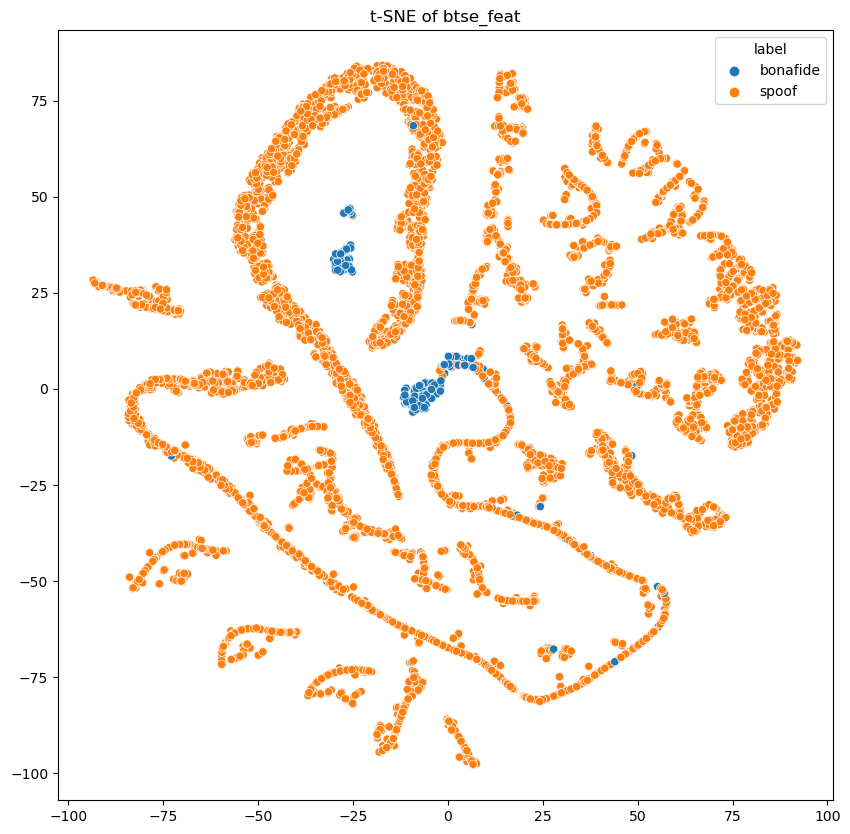

In [9]:
# visualize the features with t-SNE
# the feature is stored in btse_feat, vocosig_feat, aasistssl_feat
# the label is stored in DF21_10000['label']

# t-SNE
# btse_feat
btse_feat = np.array(btse_feat)
btse_feat = btse_feat.reshape(btse_feat.shape[0], -1)
btse_feat_embedded = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(btse_feat)
DF21_10000['btse_feat_embedded'] = list(btse_feat_embedded)

# show plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=btse_feat_embedded[:,0], y=btse_feat_embedded[:,1], hue=DF21_10000['label'])
plt.title('t-SNE of btse_feat')
plt.show()



/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 17.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.133959
[t-SNE] Computed conditional probabilities in 0.553s
[t-SNE] Iteration 50: error = 95.7300873, gradient norm = 0.0120002 (50 iterations in 8.492s)
[t-SNE] I

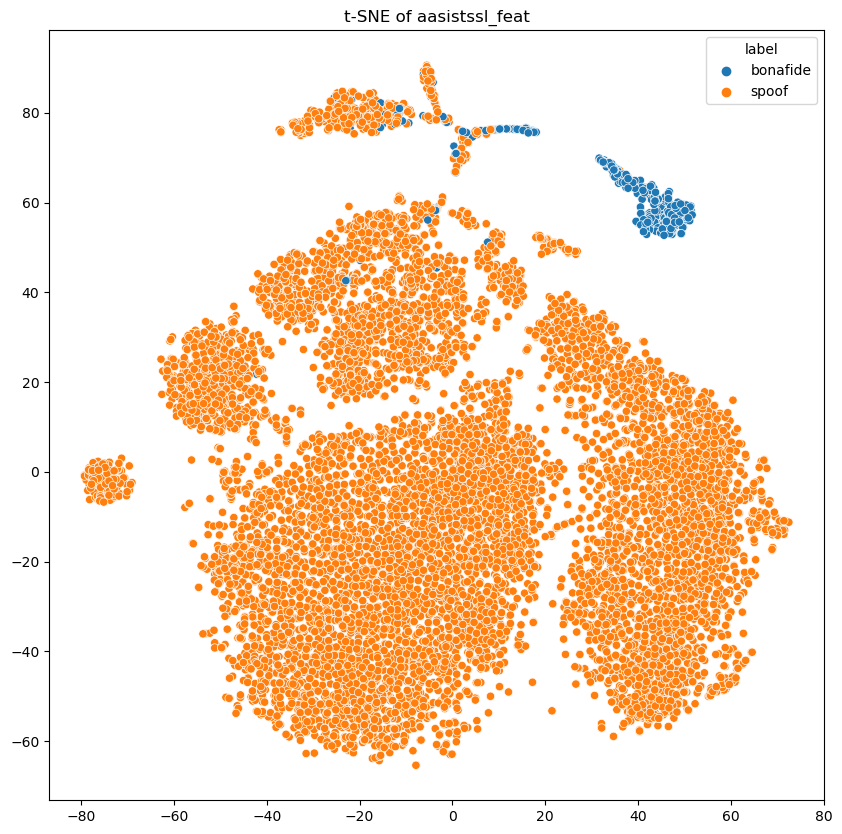

In [6]:
# visualize the features with t-SNE
# the feature is stored in btse_feat, vocosig_feat, aasistssl_feat
# the label is stored in DF21_10000['label']

# t-SNE
# aasistssl_feat
aasistssl_feat = np.array(aasistssl_feat)
aasistssl_feat = aasistssl_feat.reshape(aasistssl_feat.shape[0], -1)
aasistssl_feat_embedded = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(aasistssl_feat)
DF21_10000['aasistssl_feat_embedded'] = list(aasistssl_feat_embedded)

# show plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=aasistssl_feat_embedded[:,0], y=aasistssl_feat_embedded[:,1], hue=DF21_10000['label'])
plt.title('t-SNE of aasistssl_feat')
plt.show()



/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


[t-SNE] Computed neighbors for 10000 samples in 20.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002743
[t-SNE] Computed conditional probabilities in 0.504s
[t-SNE] Iteration 50: error = 94.3556519, gradient norm = 0.0222318 (50 iterations in 7.863s)
[t-SNE] Iteration 100: error = 75.9375153, gradient norm = 0.0047954 (50 iterations in 7.810s)

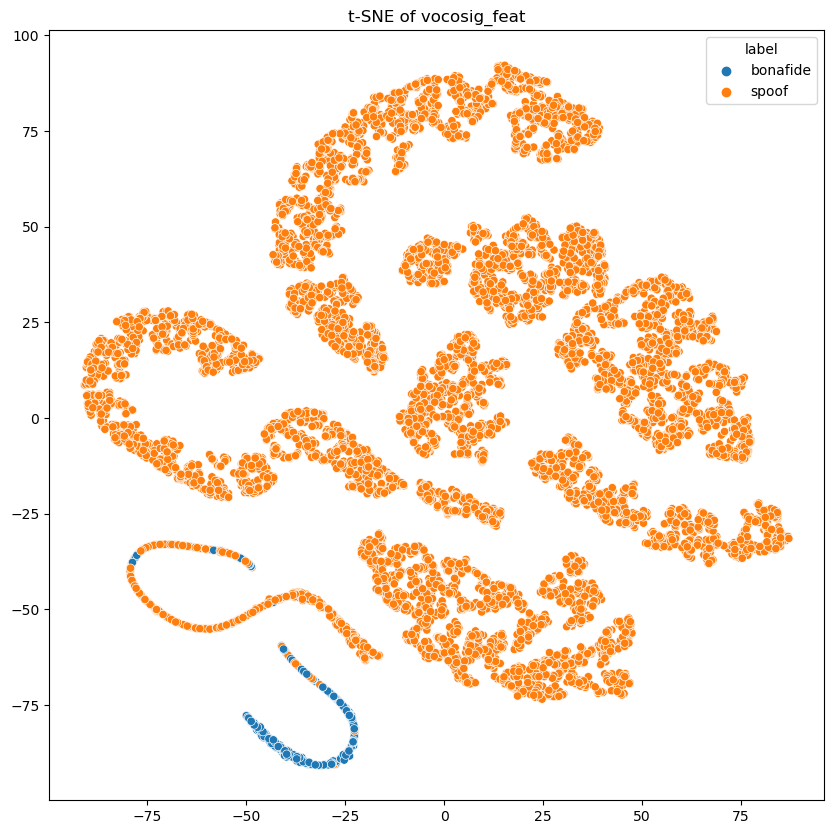

In [9]:
# visualize the features with t-SNE
# the feature is stored in btse_feat, vocosig_feat, aasistssl_feat
# the label is stored in DF21_10000['label']

# t-SNE
# vocosig_feat
vocosig_feat = np.array(vocosig_feat)
vocosig_feat = vocosig_feat.reshape(vocosig_feat.shape[0], -1)
vocosig_feat_embedded = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(vocosig_feat)
DF21_10000['vocosig_feat_embedded'] = list(vocosig_feat_embedded)

# show plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=vocosig_feat_embedded[:,0], y=vocosig_feat_embedded[:,1], hue=DF21_10000['label'])
plt.title('t-SNE of vocosig_feat')
plt.show()


